In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.keys()
plt.rc('font', family='serif')
params = {
   'axes.labelsize': 30,
   'axes.linewidth': 1.5,
   'legend.fontsize': 25,
   'legend.frameon': False,
   'lines.linewidth': 2,
   'xtick.direction': 'in',
   'xtick.labelsize': 25,
   'xtick.major.bottom': True,
   'xtick.major.pad': 10,
   'xtick.major.size': 10,
   'xtick.major.width': 1,
   'xtick.minor.bottom': True,
   'xtick.minor.pad': 3.5,
   'xtick.minor.size': 5,
   'xtick.minor.top': True,
   'xtick.minor.visible': True,
   'xtick.minor.width': 1,
   'xtick.top': True,
   'ytick.direction': 'in',
   'ytick.labelsize': 25,
   'ytick.major.pad': 10,
   'ytick.major.size': 10,
   'ytick.major.width': 1,
   'ytick.minor.pad': 3.5,
   'ytick.minor.size': 5,
   'ytick.minor.visible': True,
   'ytick.minor.width': 1,
   'ytick.right': True,
   'figure.figsize': [10,10], # instead of 4.5, 4.5
   'savefig.format': 'eps',
   'text.usetex': False,
   }
plt.rcParams.update(params)

# use to print progress bar
import time, sys
from IPython.display import clear_output
def update_progress(progress):
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1

    block = int(round(bar_length * progress))

    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)

In [64]:
import random

def randWalk(steps):
    knite=np.array([0,0])
    choices=[[-2,1],[-2,-1],[2,1],[2,-1],
            [1,2],[1,-2],[-1,2],[-1,-2]]
    for i in range(steps):
        knites=[knite+j for j in choices]
        choices_n=[]
        for j in knites:
            if j[0]>0 and j[1]>0:
                choices_n.append(j)
        knite=random.choice(choices_n)
    return knite
        

def randWalk_multi(steps,walksers=1e5):
    walksers=int(walksers)
    knites=np.zeros((walksers,2))
    for i in range(walksers):
        update_progress(float(i)/float(walksers))
        knites[i,:]=randWalk(steps)
    return knites

def calcDist(knites):
    dists=np.zeros(len(knites))
    for i in range(len(knites)):
        dists[i]=np.sqrt(knites[i,0]**2+knites[i,1]**2)
    return dists

# for 10

In [44]:
kni=randWalk_multi(10,1e5)

In [45]:
dis=calcDist(kni)

In [56]:
meandist=np.zeros(len(dis))
for i in range(10,len(dis)):
    meandist[i]=np.mean(dis[:i])

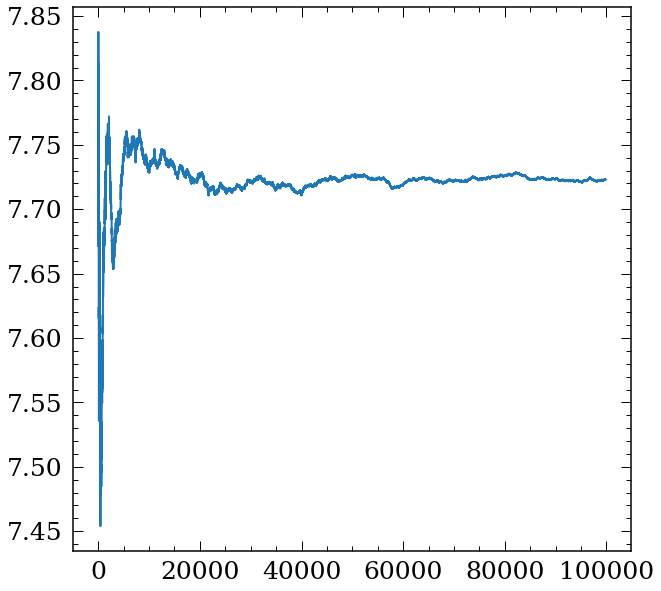

In [57]:
plt.plot(meandist[200:])

In [58]:
np.median(meandist)

7.722948831886265

3.1016482489535546

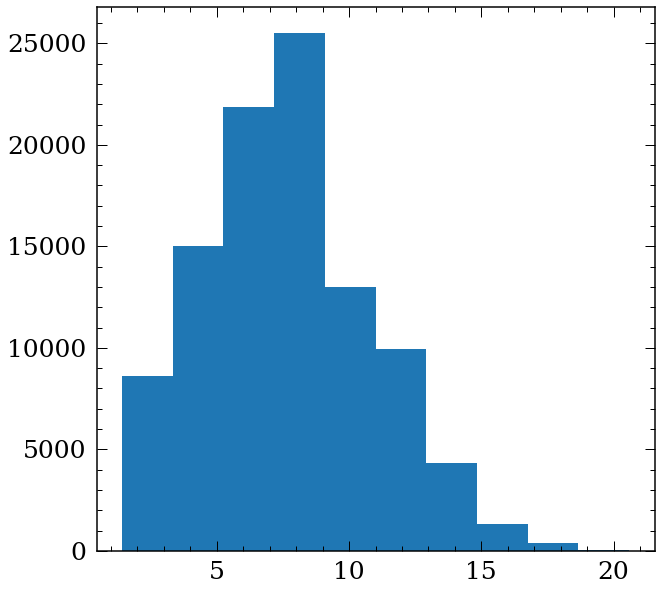

In [61]:
plt.hist(dis)
np.std(dis)

# for 100

In [65]:
kni=randWalk_multi(100,1e5)

Progress: [####################] 100.0%


In [66]:
dis=calcDist(kni)

In [67]:
meandist=np.zeros(len(dis))
for i in range(10,len(dis)):
    meandist[i]=np.mean(dis[:i])

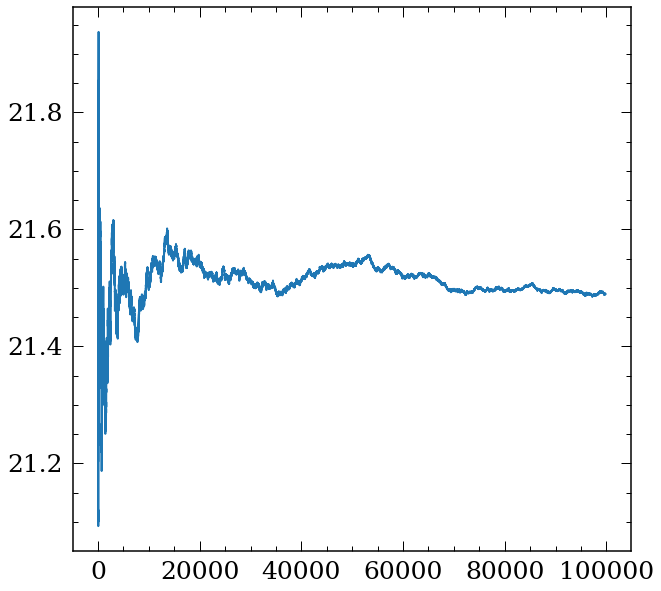

In [68]:
plt.plot(meandist[200:])

In [69]:
np.median(meandist)

21.509862620852445

10.33887273066217

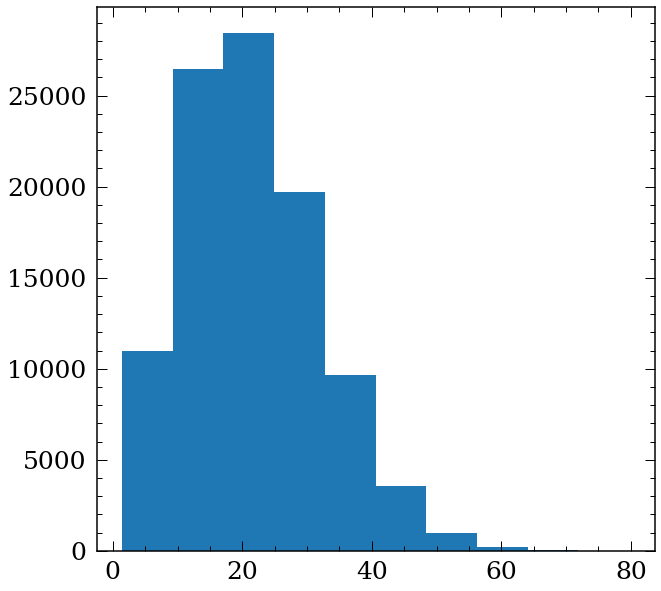

In [70]:
plt.hist(dis)
np.std(dis)